In [331]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [332]:
# LOAD AND PREPROCESS ARCTIC ICE DATA 

# Load and concatenate all arctic ice files into one dataset
filepath = './Data/Arctic_Ice_Monthly/N_*.csv'
all_files = glob.glob(filepath)
dataframe = []
for filename in all_files:
    df = pd.read_csv(filename)
    dataframe.append(df)
Combined_ArcticIce_Dataset = pd.concat(dataframe, ignore_index=True)


# Drop necessary columns from the dataset
Combined_ArcticIce_Dataset.drop([' mo','    data-type', ' region'], axis=1, inplace=True)

# Replace negatvie values in the dataset (null values) with column mean to not lose data
for col in Combined_ArcticIce_Dataset.columns:
    column_mean = Combined_ArcticIce_Dataset[Combined_ArcticIce_Dataset[col] >= 0][col].mean()
    Combined_ArcticIce_Dataset[col] = Combined_ArcticIce_Dataset[col].apply(lambda x: column_mean if x < 0 else x)
    
# Group duplicate year values (for each month) and extract annual averages for ice extent and area and update dataset
Avg_ArcticIce_Dataset = Combined_ArcticIce_Dataset.groupby('year')[[' extent', '   area']].mean().reset_index()
    
# Filter the data to the years covered by the methane data
Avg_ArcticIce_Filtered =  Avg_ArcticIce_Dataset[(Avg_ArcticIce_Dataset['year'] >= 1983) & (Avg_ArcticIce_Dataset['year'] <= 2023)].reset_index()

# Rename columns to avoid confusion in the future
Avg_ArcticIce_Filtered = Avg_ArcticIce_Filtered.rename(columns={'   area': 'area_avg', ' extent': 'extent_avg'})

# Drop unneccesary index column
Avg_ArcticIce_Filtered = Avg_ArcticIce_Filtered[['year', 'extent_avg', 'area_avg']]

print(Avg_ArcticIce_Filtered)

    year  extent_avg   area_avg
0   1983   12.353333   9.430833
1   1984   11.920000   9.012500
2   1985   12.015833   9.105833
3   1986   12.224167   9.294167
4   1987   12.094494   9.864752
5   1988   11.888661   9.850293
6   1989   11.986667   9.932500
7   1990   11.717500   9.668333
8   1991   11.770000   9.742500
9   1992   12.121667  10.099167
10  1993   11.946667   9.810000
11  1994   12.032500   9.989167
12  1995   11.438333   9.427500
13  1996   11.848333   9.799167
14  1997   11.691667   9.616667
15  1998   11.781667   9.626667
16  1999   11.713333   9.693333
17  2000   11.519167   9.457500
18  2001   11.622500   9.569167
19  2002   11.385000   9.356667
20  2003   11.419167   9.289167
21  2004   11.250833   9.367500
22  2005   10.927500   9.020833
23  2006   10.794167   8.802500
24  2007   10.498333   8.460000
25  2008   10.990000   9.235000
26  2009   10.955833   9.236667
27  2010   10.734167   8.980000
28  2011   10.505833   8.775833
29  2012   10.420000   8.661667
30  2013

In [333]:
# LOAD AND PREPROCESS TEMPERATURE DATA 

# Load and process temperature dataset
Avg_Temp = pd.read_csv('./Data/Temps.csv')
Avg_Temp = Avg_Temp[['DATE', 'TAVG']]

#splits date into year and month columns
Avg_Temp[['year', 'mo']] = Avg_Temp['DATE'].str.split('-', expand=True)

Avg_Temp = Avg_Temp.drop('DATE', axis=1)

# Group duplicate year values (for each month) and extract annual average temperature and update dataset
annual_averages = Avg_Temp.groupby('year')['TAVG'].mean().reset_index()
Avg_Temp = annual_averages

# fitlers the data to the years covered by the methane data
Avg_Temp['year'] = Avg_Temp['year'].astype('int')
Avg_Temp_Filtered =  Avg_Temp[(Avg_Temp['year'] >= 1983) & (Avg_Temp['year'] <= 2023)].reset_index()

# Rename columns to avoid confusion in the future
Avg_Temp_Filtered = Avg_Temp_Filtered.rename(columns={'TAVG': 'temp_avg'})

# Drop uneccessary index column
Avg_Temp_Filtered = Avg_Temp_Filtered[['year', 'temp_avg']]

print(Avg_Temp_Filtered)

    year   temp_avg
0   1983 -12.620833
1   1984 -13.700833
2   1985 -11.900833
3   1986 -11.574167
4   1987 -12.248333
5   1988 -13.194167
6   1989 -10.348333
7   1990 -12.250000
8   1991 -12.384167
9   1992 -12.428333
10  1993 -10.172500
11  1994 -12.655000
12  1995 -10.884167
13  1996 -10.777500
14  1997 -10.860000
15  1998  -8.371667
16  1999 -12.010000
17  2000 -11.788333
18  2001 -11.936667
19  2002 -10.220833
20  2003 -10.616667
21  2004 -10.765000
22  2005 -10.296667
23  2006 -10.370833
24  2007  -9.291667
25  2008 -10.391667
26  2009 -10.322500
27  2010  -9.817500
28  2011  -9.988333
29  2012 -10.519167
30  2013  -9.727500
31  2014  -9.430000
32  2015  -9.865833
33  2016  -7.227500
34  2017  -7.521667
35  2018  -8.312500
36  2019  -6.136667
37  2020  -9.605833
38  2021  -9.982500
39  2022  -8.940000
40  2023  -7.160909


In [334]:
# LOAD AND PREPROCESS METHANE DATA 

# Load and process methane dataset
Avg_CH4 = pd.read_csv('./Data/Methane.csv')
Avg_CH4 = Avg_CH4[['year', 'average']]

# Group duplicate year values (for each month) and extract annual average temperature and update dataset
Annual_CH4_Avgs = Avg_CH4.groupby('year')['average'].mean().reset_index()
Avg_CH4 = Annual_CH4_Avgs

# Rename columns to avoid confusion in the future
Avg_CH4 = Avg_CH4.rename(columns={'average': 'CH4_avg'})

# Drop unneccessary index column
Avg_CH4 = Avg_CH4[['year', 'CH4_avg']]


print(Avg_CH4)

    year      CH4_avg
0   1983  1636.561667
1   1984  1645.013333
2   1985  1657.370833
3   1986  1670.210833
4   1987  1682.803333
5   1988  1693.389167
6   1989  1704.625833
7   1990  1714.531667
8   1991  1724.944167
9   1992  1735.460833
10  1993  1736.582500
11  1994  1742.157500
12  1995  1748.895833
13  1996  1751.313333
14  1997  1754.561667
15  1998  1765.655000
16  1999  1772.369167
17  2000  1773.203333
18  2001  1771.246667
19  2002  1772.705000
20  2003  1777.354167
21  2004  1777.020000
22  2005  1774.193333
23  2006  1774.986667
24  2007  1781.456667
25  2008  1787.094167
26  2009  1793.553333
27  2010  1798.972500
28  2011  1803.193333
29  2012  1808.188333
30  2013  1813.483333
31  2014  1822.666667
32  2015  1834.366667
33  2016  1843.179167
34  2017  1849.632500
35  2018  1857.444167
36  2019  1866.660833
37  2020  1879.096667
38  2021  1895.410000
39  2022  1911.967500
40  2023  1919.235000


In [335]:
# LOAD AND PREPROCESS CARBON DIOXIDE DATA 

# Load and process carbon dioxide dataset
Avg_CO2 = pd.read_csv('./Data/Carbon_Dioxide.csv')
Avg_CO2 = Avg_CO2[['year', 'average']]

# Group duplicate year values (for each month) and extract annual average temperature and update dataset
Annual_CO2_Avgs = Avg_CO2.groupby('year')['average'].mean().reset_index()
Avg_CO2 = Annual_CO2_Avgs

# Filter the data to the years covered by the methane data
Avg_CO2_Filtered =  Avg_CO2[(Avg_CO2['year'] >= 1983) & (Avg_CO2['year'] <= 2023)].reset_index()

# Rename columns to avoid confusion in the future
Avg_CO2_Filtered = Avg_CO2_Filtered.rename(columns={'average' : 'CO2_avg'})

# Drop 
Avg_CO2_Filtered = Avg_CO2_Filtered[['year', 'CO2_avg']]

print(Avg_CO2_Filtered)

    year     CO2_avg
0   1983  342.530000
1   1984  344.073333
2   1985  345.537500
3   1986  346.968333
4   1987  348.684167
5   1988  351.159167
6   1989  352.787500
7   1990  354.055833
8   1991  355.393333
9   1992  356.092500
10  1993  356.833333
11  1994  358.330000
12  1995  360.171667
13  1996  361.932500
14  1997  363.042500
15  1998  365.696667
16  1999  367.794167
17  2000  368.965000
18  2001  370.573333
19  2002  372.583333
20  2003  375.140833
21  2004  376.952500
22  2005  378.980833
23  2006  381.149167
24  2007  382.900000
25  2008  385.020833
26  2009  386.497500
27  2010  388.756667
28  2011  390.632500
29  2012  392.650833
30  2013  395.397500
31  2014  397.345000
32  2015  399.648333
33  2016  403.066667
34  2017  405.219167
35  2018  407.610833
36  2019  410.072500
37  2020  412.443333
38  2021  414.703333
39  2022  417.072500
40  2023  418.983333


In [336]:
# Combine Temperature, CH4 and CO2 datasets with the Arctic Ice dataset
Processed_Dataset = pd.merge(Avg_ArcticIce_Filtered, Avg_Temp_Filtered[['year', 'temp_avg']], on='year', how='left')
Processed_Dataset = pd.merge(Processed_Dataset, Avg_CH4[['year', 'CH4_avg']], on='year', how='left')
Processed_Dataset = pd.merge(Processed_Dataset, Avg_CO2_Filtered[['year', 'CO2_avg']], on='year', how='left')
print(Processed_Dataset)


    year  extent_avg   area_avg   temp_avg      CH4_avg     CO2_avg
0   1983   12.353333   9.430833 -12.620833  1636.561667  342.530000
1   1984   11.920000   9.012500 -13.700833  1645.013333  344.073333
2   1985   12.015833   9.105833 -11.900833  1657.370833  345.537500
3   1986   12.224167   9.294167 -11.574167  1670.210833  346.968333
4   1987   12.094494   9.864752 -12.248333  1682.803333  348.684167
5   1988   11.888661   9.850293 -13.194167  1693.389167  351.159167
6   1989   11.986667   9.932500 -10.348333  1704.625833  352.787500
7   1990   11.717500   9.668333 -12.250000  1714.531667  354.055833
8   1991   11.770000   9.742500 -12.384167  1724.944167  355.393333
9   1992   12.121667  10.099167 -12.428333  1735.460833  356.092500
10  1993   11.946667   9.810000 -10.172500  1736.582500  356.833333
11  1994   12.032500   9.989167 -12.655000  1742.157500  358.330000
12  1995   11.438333   9.427500 -10.884167  1748.895833  360.171667
13  1996   11.848333   9.799167 -10.777500  1751

In [337]:
# Replace outliers from the data with their column mean by computing interquartile range 
def replaceOutliers(df, col):

    # Get quartile 1 and 3
    quartile1 = df[col].quantile(0.25)
    quartile3 = df[col].quantile(0.75)
    IQR = quartile3 - quartile1

    #  iterate through columna to see which data values are outliers
    index = 0
    count = 0
    for val in df[col]:
                  column_mean = df[col].mean()
                  
                  if val < quartile1 - (1.5 * IQR) or val > quartile3 + (1.5 * IQR):
                          print("column: " + str(col))
                          year = df.iloc[index]['year']
                          print("year: " + str(year))
                          print("val: " + str(val))
                          count = count + 1
                  index += 1
                  
    print(count)
    df[col] = df[col].apply(lambda x: df[col].mean() if x < quartile1 - (1.5 * IQR) or x > quartile3 + (1.5 * IQR) else x)

# There was only a single outlier in the whole dataset and the MSE was negatively impacted by removing it
#for col in Processed_Dataset:
#        replaceOutliers(Processed_Dataset, col)

0
0
0
column: temp_avg
year: 2019.0
val: -6.136666666666667
1
0
0


In [338]:
# Plot Correlation matrix for dataset
corr_matrix = Processed_Dataset.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [339]:
# Create a linear regression model to predict arctic ice extent using all the features as input
def multivarlinearRegressionModel(df):
    
    # Split the data into features (independent variables) and target (dependent variable)
    X = df[['year', 'temp_avg', 'CH4_avg', 'CO2_avg']]
    #X_reshaped = X.values.reshape(-1,1)
    Y = df['extent_avg']

    # Create linear regression model and fit it to the training data
    lin_reg = LinearRegression()
    lin_reg.fit(X,Y)

    # Evaluate the model
    y_pred = lin_reg.predict(X)
    mse = mean_squared_error(Y, y_pred)
    print(mse)

    # Plot results to show difference between actual ice extent data versus predicted ice extent data
    for col in X: 
        plt.figure()
        plt.scatter(df[col], Y, color='blue', label='Actual Ice Extent')
        plt.scatter(df[col], y_pred, color='red', label='Predicted Ice Extent', alpha=0.7)
        plt.xlabel(col)
        plt.ylabel('Arctic Ice Extent')
        plt.title('Actual vs Predicted Arctic Ice Extent')
        plt.legend()
        plt.show()
        
    # Plot results to show feature importance relationship with ice extent 
    feature_importance = lin_reg.coef_
    plt.figure()
    plt.bar(['Year', 'Temp', 'CH4', 'CO2'], feature_importance)
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.title('Feature Importance in Predicting Arctic Ice Extent')
    plt.show()

0.032469414021973265


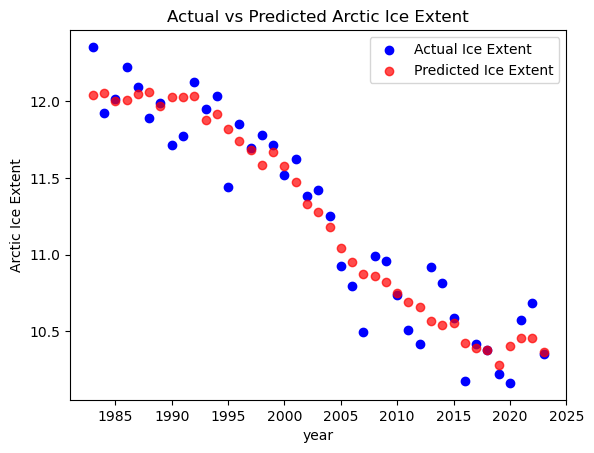

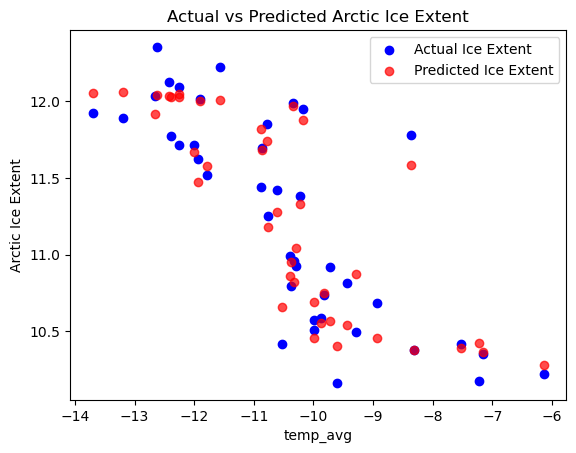

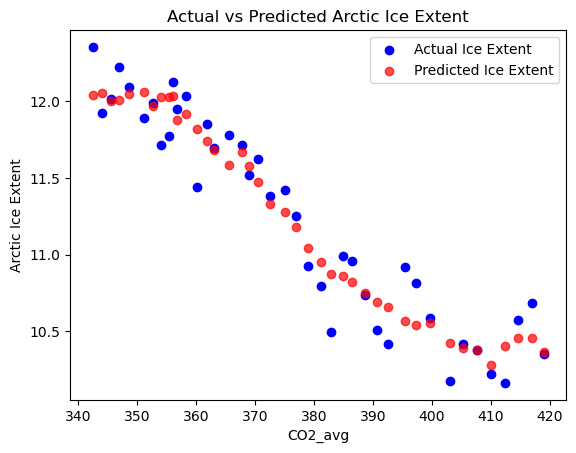

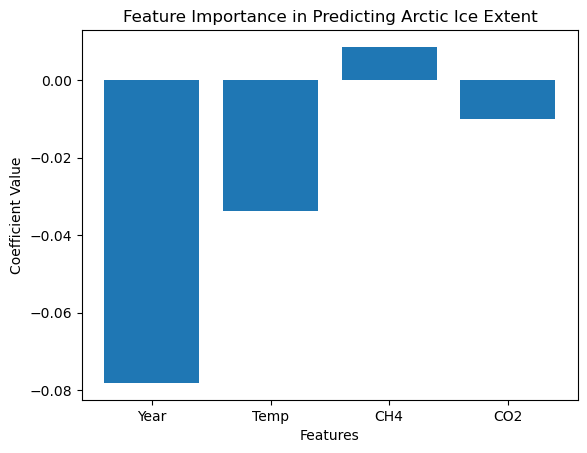

In [340]:
multivarlinearRegressionModel(Processed_Dataset)

0.0320485800182784


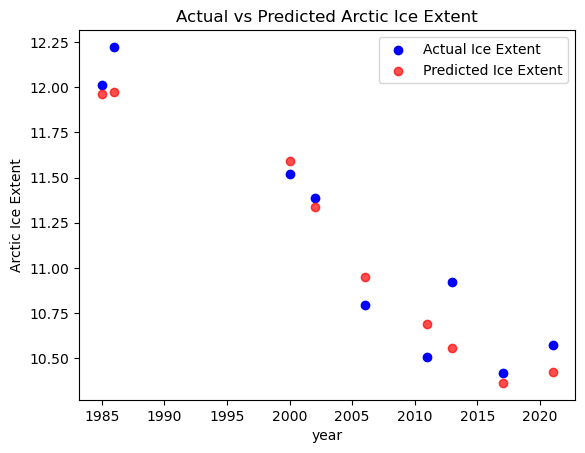

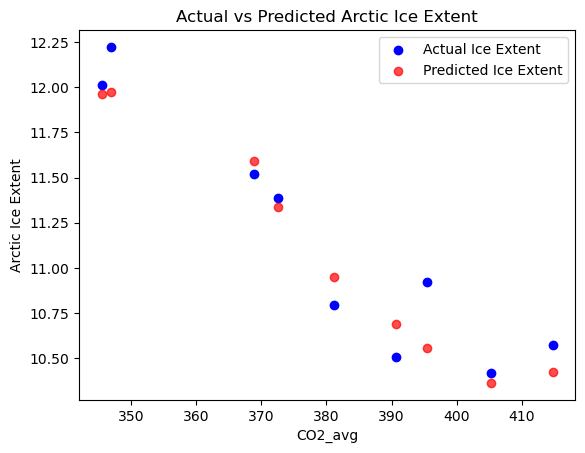

In [341]:
# Creating a regression model using a train/test split
def multivartraintestlinearRegressionModel(df):
    # Create a linear regression model to predict arctic ice extent using the year as input

    # Split the data into features (independent variables) and target (dependent variable)
    X = df[['year', 'temp_avg', 'CH4_avg', 'CO2_avg']]
    #X_reshaped = X.values.reshape(-1,1)
    Y = df['extent_avg']

    # Split the data into training and testing -> to be able to evaluate the model based on predictions
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

    # Create linear regression model and fit it to the training data
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)
    #lin_reg.fit(X_reshaped,Y)

    # Evaluate the model
    y_pred = lin_reg.predict(X_test)
    #y_pred = lin_reg.predict(X_reshaped)
    #mse = mean_squared_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(mse)

    # Plot results to show difference between actual ice extent data versus predicted ice extent data
    for col in X: 
        plt.figure()
        plt.scatter(X_test[col], y_test, color='blue', label='Actual Ice Extent')
        plt.scatter(X_test[col], y_pred, color='red', label='Predicted Ice Extent', alpha=0.7)
        plt.xlabel(col)
        plt.ylabel('Arctic Ice Extent')
        plt.title('Actual vs Predicted Arctic Ice Extent')
        plt.legend()
        plt.show()
    
multivartraintestlinearRegressionModel(Processed_Dataset)

year
feature MSE: 
0.05094270173753637


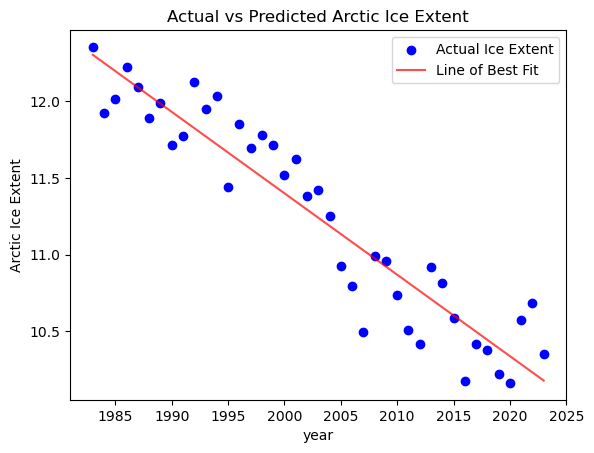

temp_avg
feature MSE: 
0.17448625922463265


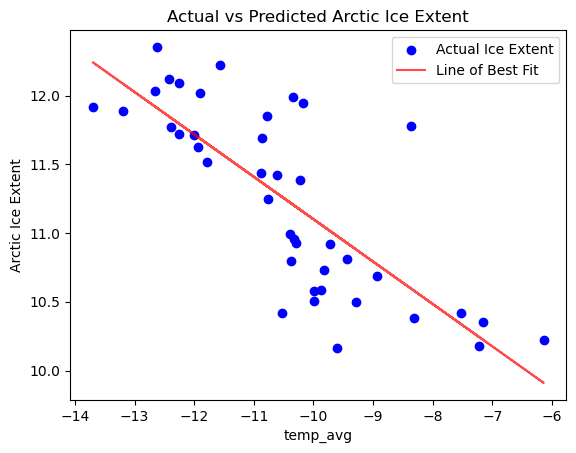

CH4_avg
feature MSE: 
0.10632200894896947


CO2_avg
feature MSE: 
0.052738896262136896


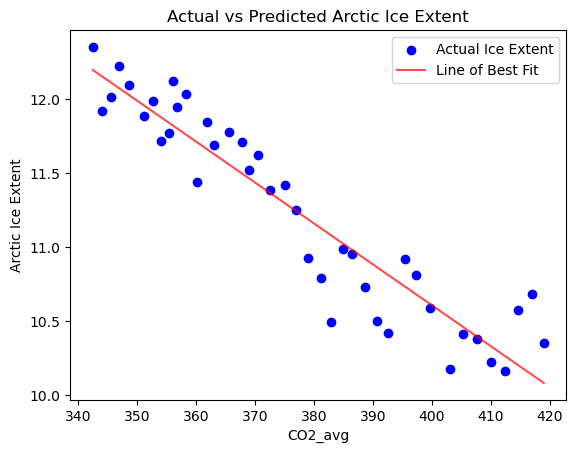

In [342]:
# Creating a linear regression model with each individual feature
def univarlinearRegressionModel(df):
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error

    # Split the data into features (independent variables) and target (dependent variable)
    X = df[['year', 'temp_avg', 'CH4_avg', 'CO2_avg']]
    #X_reshaped = X.values.reshape(-1,1)
    Y = df['extent_avg']

    # Plot results to show difference between actual ice extent data versus predicted ice extent data
    for col in X: 
        print(col)
        target = X[col]
        target_reshaped = target.values.reshape(-1,1)

        # Create linear regression model and fit it to the training data
        lin_reg = LinearRegression()
        lin_reg.fit(target_reshaped,Y)

        # Evaluate the model
        y_pred = lin_reg.predict(target_reshaped)
        mse = mean_squared_error(Y, y_pred)
        print('feature MSE: ')
        print(mse)

        plt.figure()
        plt.scatter(df[col], Y, color='blue', label='Actual Ice Extent')
        plt.plot(df[col], y_pred, color='red', label='Line of Best Fit', alpha=0.7)
        plt.xlabel(col)
        plt.ylabel('Arctic Ice Extent')
        plt.title('Actual vs Predicted Arctic Ice Extent')
        plt.legend()
        plt.show()

univarlinearRegressionModel(Processed_Dataset)

In [343]:
# Using a linear regression model with year as input to predict first arctic free year
def iceFreelinearRegressionModel(df):
    # Create a linear regression model to predict arctic ice extent using the year as input
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error

    # Split the data into features (independent variables) and target (dependent variable)
    X = df['year']
    X_reshaped = X.values.reshape(-1,1)
    Y = df['extent_avg']

    # Create linear regression model and fit it to the training data
    lin_reg = LinearRegression()
    lin_reg.fit(X_reshaped,Y)

    # Get coefficient and y-intercept from the model
    slope = lin_reg.coef_[0]
    intercept = lin_reg.intercept_

    # Solving for the year when ice extent is zero using regression equation
    year_zero_ice = -intercept / slope
    
    # Round up to nearest year
    year_zero_ice = np.ceil(year_zero_ice)  

    print("First ice free year using year as input: ", int(year_zero_ice))


iceFreelinearRegressionModel(Processed_Dataset)

First ice free year using year as input:  2215
